# Julian Lapenna Acoustics Lab

Sept 19, 16:20

Logged on. I don't see a `BareBonesDAQ.m` file... Maybe a python file has replaced it

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [12]:
from scipy.io import wavfile
samplerate, data = wavfile.read('./data/resonant.wav')
print(data.shape)
print ("Frequency sampling:", samplerate)

(480000, 2)
Frequency sampling: 96000


In [13]:
print(len(data)/samplerate) # time sampled for

5.0


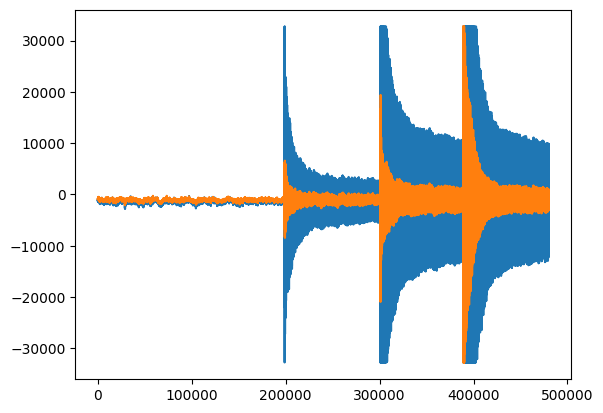

In [5]:
plt.plot(data)

In [10]:
print(data[200000]) # looks about right with graph above

[8412  116]


File naming convention (for future):

pXXXX-fXXX-aXX-tXX-X.wav = p\<position\>-f\<frequency\>-a\<amplitude\>-t\<time\>-\<close\far\>.wav

where 
* position = number of steps of the stepper motor and tells me the angle I should be observing
* frequency = 365 Hz the fundamental frequency
* amplitude = the amplitude the motor is set to, for now probably 5
* time = how long the motor goes for, for now probably 5 seconds
* c/f = for movable mic, is it close (~1-3cm) or far (~20-50cm) away

In [27]:
data1 = []

for d in data:
    data1.append(d[0])

print(len(data1))

480000


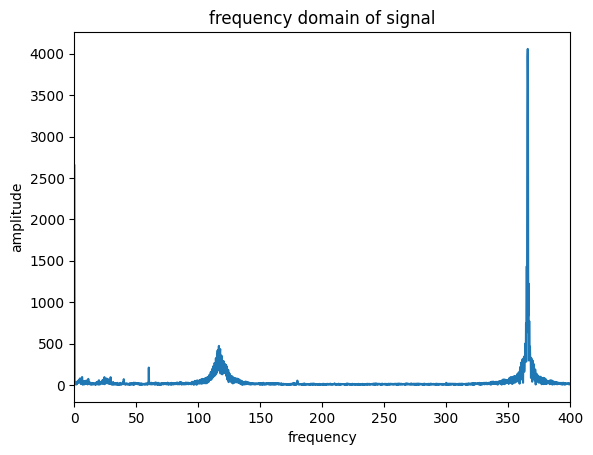

In [34]:
# finding the resonant frequency
from scipy.fft import fft, fftfreq
N = 480000 # sample points
T = 5.0 / N
x = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(data1)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('frequency domain of signal')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xlim([0,400])
plt.show()

In [37]:
print("resonant frequency:", xf[np.argmax(yf)], "Hz")

resonant frequency: 365.20000000000005 Hz


So the resonant frequency of the tuning fork is 365 Hz! Great :)

Sept 25, 15:25

Plan, get data from the close field, again in a 90deg sweep since the tuning fork is symmetric, then analyse the data later.

Issue that came up: The stepper motor that is used to position the mic at different positions was broken, so I took a protractor and switched to measuring the angle by hand. This will be a source of error, but I am hoping the data will still show the appropriate trends.

In [14]:
def show_audio_file(filename):
    samplerate, data = wavfile.read(filename)
    print(data.shape)
    print ("Frequency sampling:", samplerate)
    plt.plot(data)

def show_freqs_audio_file(filename):
    samplerate, data = wavfile.read(filename)

    data1 = []

    for d in data:
        data1.append(d[1]) # getting mic 2, the one that moves

    N = len(data1) # sample points
    T = len(data) / samplerate

    yf = fft(data1)
    xf = fftfreq(N, T)[:N//2]

    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title('frequency domain of signal')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.xlim([0,600])
    plt.show()



(192000, 2)
192000
-1124
-1103
-1098
-1083
-1080
-1076
-1070
-1065
-1069
-1078
192000 2.0


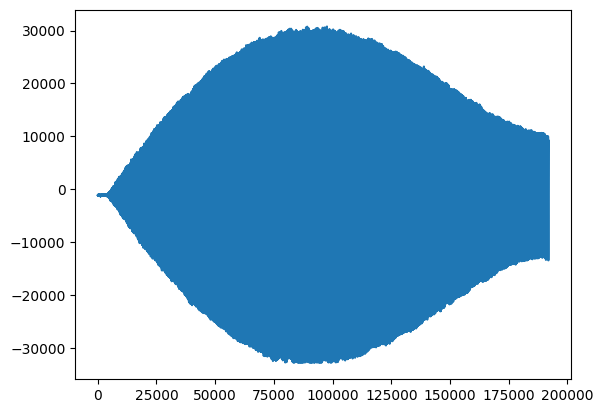

In [27]:
filename = './data/deg05-f365-a05-t02-c.wav'
# show_audio_file(filename)
# show_freqs_audio_file(filename)

samplerate, data = wavfile.read(filename)

data1 = []

for d in data:
    data1.append(d[1]) # getting mic 2, the one that moves

plt.plot(data1)
print(data.shape)
print(len(data1))

for i in range(10):
    print(data1[i])

N = len(data1) # sample points
T = len(data) / samplerate

print(N,T)

yf = fft(data1)
xf = fftfreq(N, T)[:N//2]

# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.title('frequency domain of signal')
# plt.xlabel('frequency')
# plt.ylabel('amplitude')
# plt.xlim([0,600])
# plt.show()

Sept 26, 15:35

Hold on, I don't even need to take the fourier transform, I'm looking at amplitude.